##### 1. (0 баллов) 

Загрузите из sklearn датасет цен на жилье в Бостоне.
<br>
Разделите данные на 90% обучающую и тестовую выборку с помощью функции <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a>
<br>
Разделите данные на два numpy массива: массив фич и массив с целевой переменной.
<br>
<br>
Описание датасета [по ссылке.](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset)
<br>
Документация и пример использования [по ссылке.](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### 2. <b>(2 балла)</b>

Обучите [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) на трейне. 

Примените модель на тестовых данных. (метод predict)
<br>
Посчитайте ошибку на трейне и на тесте (mse или mae, в зависимости от того, что вы использовали в обучении).
<br>
Как это сделать, можно посмотреть по ссылкам:
[mae](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
[mse](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

clf = RandomForestRegressor(criterion='mse')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_error = mean_squared_error(y_test, y_pred)
print("Ошибка mse: {}".format(y_error))

score = clf.score(X_test, y_test)
print ("Точночть (score): {}".format(score))

Ошибка mse: 7.972297058823528
Точночть (score): 0.8912875251315697


#### 3. 
Попробуйте поварьировать такие параметры, как: 
- <b>(1 балл)</b> количество деревьев (n_estimators)
- <b>(1 балл)</b> функция потерь (mse или mae)
- <b>(1 балл)</b> какие фичи использовать в обучении
- <b>(1 балл)</b> число фич в сплите (max_features)
- <b>(1 балл)</b> использование bootstrap (bootstrap=True)

Как себя ведет ошибка на трейне и тесте? Какие выводы можно сделать?

##### 4. (3 балла) 

Зафиксируя наиболее оптимальные параметры из предыдущего пункта, постройте графики функции ошибки в зависимости от параметра max_depth на train и test. При каком значении max_depth происходит переобучение? Обоснуйте ответ

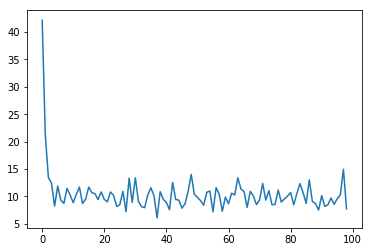

In [16]:
errors = list()
for max_depath in range(1,100):
    dtr = RandomForestRegressor(criterion='mse', max_depth=max_depath)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    y_error = mean_squared_error(y_test, y_pred)
    errors.append(y_error)
plt.plot(errors)